In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/dodkins/PythonProjects/stocks/options_testing/options_testing')

import os
from datetime import datetime 
import pandas as pd
import opstrat as op

from robinhood import get_options_plays
from yahoo import get_tsla 
from plots import plot_candles, plot_line, plot
from options import get_option_history, weekly_short_calls, LEAPS
from utils import aggregate
from quantconnect import load_tsla_hourly

In [8]:
tsla = load_tsla_hourly()

In [9]:
tsla

open        high         low       close  \
datetime                                                               
2010-06-29 10:00:00     1.266667    1.266667    1.266667    1.266667   
 2010-06-29 11:00:00    1.266667    1.266667    1.266667    1.266667   
 2010-06-29 12:00:00    1.266667    1.266667    1.169333    1.205333   
 2010-06-29 13:00:00    1.205333    1.233333    1.203333    1.224667   
 2010-06-29 14:00:00    1.225333    1.278000    1.221333    1.274667   
...                          ...         ...         ...         ...   
 2022-09-13 12:00:00  293.680000  293.990000  290.400000  291.000000   
 2022-09-13 13:00:00  291.000000  293.280000  290.670000  292.300000   
 2022-09-13 14:00:00  292.270000  295.500000  291.780000  294.830000   
 2022-09-13 15:00:00  294.830000  295.970000  293.000000  294.100000   
 2022-09-13 16:00:00  294.120000  294.990000  291.400000  292.130000   

                          volume  
datetime                          
2010-06-29 10:00:00   30418608.0  
 2010-06-29 11:00:00         0.0  
 2010-06-29 12:00:00  94438839.0  
 2010-06-29 13:00:00  30010053.0  
 2010-06-29 14:00:00  25695108.0  
...                          ...  
 2022-09-13 12:00:00   7883773.0  
 2022-09-13 13:00:00   5298142.0  
 2022-09-13 14:00:00   9703434.0  
 2022-09-13 15:00:00   7136008.0  
 2022-09-13 16:00:00  10745308.0  

[21443 rows x 5 columns]

In [15]:
df = tsla.iloc[-1000:]

In [39]:
df

underlying open  underlying high  underlying low  underlying close  \
0         302.459970       303.499970      295.999970        297.603304   
1         297.643304       299.736637      295.606637        296.379970   
2         296.396637       298.109970      295.499970        295.913304   
3         295.956637       296.033304      293.366637        293.736637   
4         293.709971       293.946637      291.999971        292.799971   
..               ...              ...             ...               ...   
995       293.680000       293.990000      290.400000        291.000000   
996       291.000000       293.280000      290.670000        292.300000   
997       292.270000       295.500000      291.780000        294.830000   
998       294.830000       295.970000      293.000000        294.100000   
999       294.120000       294.990000      291.400000        292.130000   

         volume  sell call strike  buy call strike  sell put strike  \
0    10738849.0        312.483469       315.608303       282.723138   
1     7208845.0        311.198969       314.310959       281.560972   
2     5848780.0        310.708969       313.816059       281.117639   
3     6047713.0        308.423469       311.507704       279.049805   
4     5935990.0        307.439969       310.514369       278.159972   
..          ...               ...              ...              ...   
995   7883773.0        305.550000       308.605500       276.450000   
996   5298142.0        306.915000       309.984150       277.685000   
997   9703434.0        309.571500       312.667215       280.088500   
998   7136008.0        308.805000       311.893050       279.395000   
999  10745308.0        306.736500       309.803865       277.523500   

     buy put strike  ic open  ic close  hourly profit                date  \
0        279.895907      NaN       NaN            NaN 2022-02-17 11:00:00   
1        278.745362      NaN       NaN            NaN 2022-02-17 12:00:00   
2        278.306462      NaN       NaN            NaN 2022-02-17 13:00:00   
3        276.259307      NaN       NaN            NaN 2022-02-17 14:00:00   
4        275.378372      NaN       NaN            NaN 2022-02-17 15:00:00   
..              ...      ...       ...            ...                 ...   
995      273.685500      NaN       NaN            NaN 2022-09-13 12:00:00   
996      274.908150      NaN       NaN            NaN 2022-09-13 13:00:00   
997      277.287615      NaN       NaN            NaN 2022-09-13 14:00:00   
998      276.601050      NaN       NaN            NaN 2022-09-13 15:00:00   
999      274.748265      NaN       NaN            NaN 2022-09-13 16:00:00   

     week     date_expiration       dte  
0       7 2022-02-18 16:00:00  1.208333  
1       7 2022-02-18 16:00:00  1.166667  
2       7 2022-02-18 16:00:00  1.125000  
3       7 2022-02-18 16:00:00  1.083333  
4       7 2022-02-18 16:00:00  1.041667  
..    ...                 ...       ...  
995    37 2022-09-13 16:00:00  0.166667  
996    37 2022-09-13 16:00:00  0.125000  
997    37 2022-09-13 16:00:00  0.083333  
998    37 2022-09-13 16:00:00  0.041667  
999    37 2022-09-13 16:00:00  0.000000  

[1000 rows x 16 columns]

In [40]:
from options import iron_condor
ic = iron_condor(tsla.iloc[-1000:], long_offset=5, short_offset=5, wing_distance=1, poc_window=0)

In [45]:
ic.iloc[300:350].round(2)

underlying open  underlying high  underlying low  underlying close  \
300           358.53           364.07          353.83            357.57   
301           357.52           358.91          350.26            352.26   
302           352.27           352.51          345.36            345.69   
303           345.75           347.44          343.33            344.55   
304           344.55           347.17          342.31            342.72   
305           342.69           342.71          332.67            334.62   
306           334.69           337.67          332.14            336.26   
307           338.41           340.78          331.35            340.00   
308           340.04           344.94          335.89            341.57   
309           341.51           344.45          337.88            338.36   
310           338.35           340.57          336.71            337.15   
311           337.20           338.09          334.10            334.22   
312           334.22           338.56          333.98            335.00   
313           334.96           338.62          334.53            335.02   
314           326.46           332.24          325.11            329.84   
315           329.78           336.21          328.36            331.39   
316           331.40           334.54          329.83            330.49   
317           330.41           334.08          328.69            330.81   
318           330.86           333.41          329.87            332.15   
319           332.22           335.59          330.12            330.54   
320           330.51           333.59          326.33            332.67   
321           331.81           333.33          313.11            314.46   
322           314.50           315.68          300.77            301.52   
323           301.46           303.72          297.80            297.88   
324           297.90           302.33          297.19            300.74   
325           300.72           300.83          295.10            295.55   
326           295.48           299.33          294.17            298.97   
327           299.00           299.83          291.67            292.14   
328           299.81           306.00          297.43            300.53   
329           300.50           301.67          293.83            298.62   
330           298.66           303.60          298.63            300.67   
331           300.72           303.50          299.33            300.86   
332           300.82           301.23          298.43            300.17   
333           300.17           300.38          295.03            295.66   
334           295.64           295.81          292.45            293.84   
335           298.67           300.00          276.67            280.79   
336           280.61           281.67          273.84            279.56   
337           279.57           282.58          276.91            279.66   
338           279.64           291.97          278.88            289.65   
339           289.66           292.89          287.07            292.68   
340           292.68           298.40          290.16            296.22   
341           296.17           296.78          291.21            292.50   
342           300.48           311.14          296.70            310.90   
343           310.99           311.45          300.34            302.90   
344           302.80           306.33          301.00            303.74   
345           303.72           303.90          297.74            298.67   
346           298.65           301.95          297.29            297.31   
347           297.35           297.57          292.59            294.55   
348           294.57           295.63          290.00            290.25   
349           287.21           294.50          282.59            292.19   

         volume  sell call strike  buy call strike  sell put strike  \
300  23957396.0            375.45           379.20           339.69   
301  18625751.0            369.88    

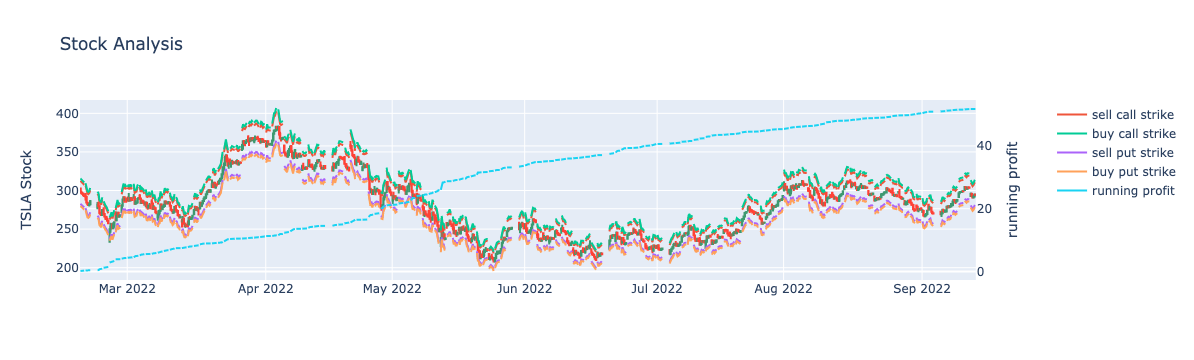

underlying open  underlying high  underlying low  underlying close  \
299           325.94           328.56          325.08            325.73   
300           358.53           364.07          353.83            357.57   
301           357.52           358.91          350.26            352.26   
302           352.27           352.51          345.36            345.69   
303           345.75           347.44          343.33            344.55   
304           344.55           347.17          342.31            342.72   
305           342.69           342.71          332.67            334.62   
306           334.69           337.67          332.14            336.26   
307           338.41           340.78          331.35            340.00   
308           340.04           344.94          335.89            341.57   
309           341.51           344.45          337.88            338.36   
310           338.35           340.57          336.71            337.15   
311           337.20           338.09          334.10            334.22   
312           334.22           338.56          333.98            335.00   
313           334.96           338.62          334.53            335.02   
314           326.46           332.24          325.11            329.84   
315           329.78           336.21          328.36            331.39   
316           331.40           334.54          329.83            330.49   
317           330.41           334.08          328.69            330.81   
318           330.86           333.41          329.87            332.15   
319           332.22           335.59          330.12            330.54   
320           330.51           333.59          326.33            332.67   
321           331.81           333.33          313.11            314.46   
322           314.50           315.68          300.77            301.52   
323           301.46           303.72          297.80            297.88   
324           297.90           302.33          297.19            300.74   
325           300.72           300.83          295.10            295.55   
326           295.48           299.33          294.17            298.97   
327           299.00           299.83          291.67            292.14   
328           299.81           306.00          297.43            300.53   
329           300.50           301.67          293.83            298.62   
330           298.66           303.60          298.63            300.67   
331           300.72           303.50          299.33            300.86   
332           300.82           301.23          298.43            300.17   
333           300.17           300.38          295.03            295.66   
334           295.64           295.81          292.45            293.84   
335           298.67           300.00          276.67            280.79   
336           280.61           281.67          273.84            279.56   
337           279.57           282.58          276.91            279.66   
338           279.64           291.97          278.88            289.65   
339           289.66           292.89          287.07            292.68   
340           292.68           298.40          290.16            296.22   
341           296.17           296.78          291.21            292.50   
342           300.48           311.14          296.70            310.90   
343           310.99           311.45          300.34            302.90   
344           302.80           306.33          301.00            303.74   
345           303.72           303.90          297.74            298.67   
346           298.65           301.95          297.29            297.31   
347           297.35           297.57          292.59            294.55   
348           294.57           295.63          290.00            290.25   
349           287.21           294.50          282.59            292.19   

         volume  sell call strike  buy call strike  sell put strike  \
299   9930154.0            342.02

In [47]:
from plots import plot_candles_and_profit
plot_candles_and_profit(ic, lines=legs)
ic.iloc[300-1:350].round(2)

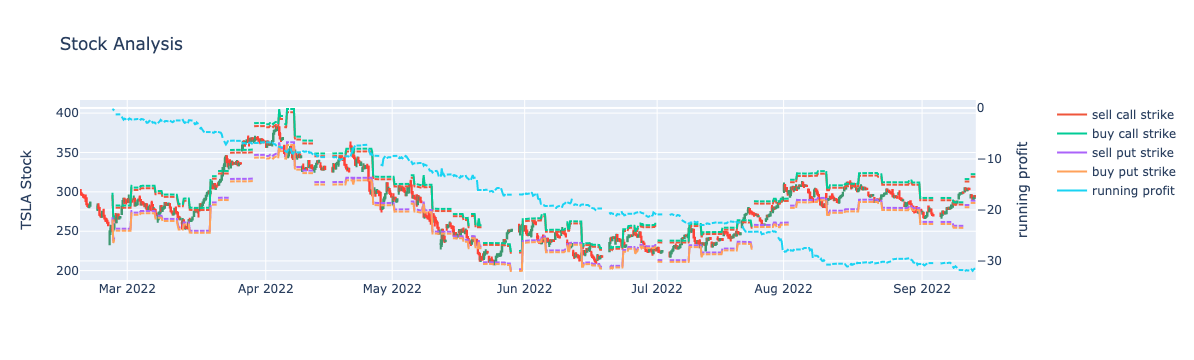

underlying open  underlying high  underlying low  underlying close  \
299           325.94           328.56          325.08            325.73   
300           358.53           364.07          353.83            357.57   
301           357.52           358.91          350.26            352.26   
302           352.27           352.51          345.36            345.69   
303           345.75           347.44          343.33            344.55   
304           344.55           347.17          342.31            342.72   
305           342.69           342.71          332.67            334.62   
306           334.69           337.67          332.14            336.26   
307           338.41           340.78          331.35            340.00   
308           340.04           344.94          335.89            341.57   
309           341.51           344.45          337.88            338.36   
310           338.35           340.57          336.71            337.15   
311           337.20           338.09          334.10            334.22   
312           334.22           338.56          333.98            335.00   
313           334.96           338.62          334.53            335.02   
314           326.46           332.24          325.11            329.84   
315           329.78           336.21          328.36            331.39   
316           331.40           334.54          329.83            330.49   
317           330.41           334.08          328.69            330.81   
318           330.86           333.41          329.87            332.15   
319           332.22           335.59          330.12            330.54   
320           330.51           333.59          326.33            332.67   
321           331.81           333.33          313.11            314.46   
322           314.50           315.68          300.77            301.52   
323           301.46           303.72          297.80            297.88   
324           297.90           302.33          297.19            300.74   

         volume         poc sell call strike buy call strike sell put strike  \
299   9930154.0  334.496306       351.221121      354.733332      317.771491   
300  23957396.0  334.482465       351.206588      354.718654      317.758342   
301  18625751.0  334.474028       351.197729      354.709707      317.750327   
302  12602620.0  334.474028       351.197729      354.709707      317.750327   
303   8857858.0  328.859546       345.302524      348.755549      312.416569   
304   7482388.0  334.474028       351.197729      354.709707      317.750327   
305  12156982.0  334.474028       351.197729      354.709707      317.750327   
306  14782597.0  334.537829        351.26472      354.777368      317.810937   
307  11712409.0  334.537829        351.26472      354.777368      317.810937   
308  14888776.0  334.537829        351.26472      354.777368      317.810937   
309   9482977.0  334.537829        351.26472      354.777368      317.810937   
310   6616747.0  334.537829        351.26472      354.777368      317.810937   
311   5945668.0  334.537829        351.26472      354.777368      317.810937   
312   6768343.0  334.474028       351.197729      354.709707      317.750327   
313  11391436.0  334.537829        351.26472      354.777368      317.810937   
314  12254023.0   334.60163       351.331711      354.845028      317.871548   
315  12879358.0   334.60163       351.331711      354.845028      317.871548   
316   6412486.0   334.60163       351.331711      354.845028      317.871548   
317   6080215.0   334.60163       351.331711      354.845028      317.871548   
318   4068108.0   334.60163       351.331711      354.845028      317.871548   
319   7183567.0   334.60163       351.331711      354.845028      317.871548   
320  15256922.0   334.60163       351.331711      354.845028      317.871548   
321  19515842.0   334.60163       351.331711      354.845028      317.871548   
322  34209903.0  334.587709       351.317094      354.83026

In [49]:
ic = iron_condor(tsla.iloc[-1000:], long_offset=5, short_offset=5, wing_distance=1, poc_window=30)
plot_candles_and_profit(ic, lines=legs)
ic.iloc[300-1:325].round(2)

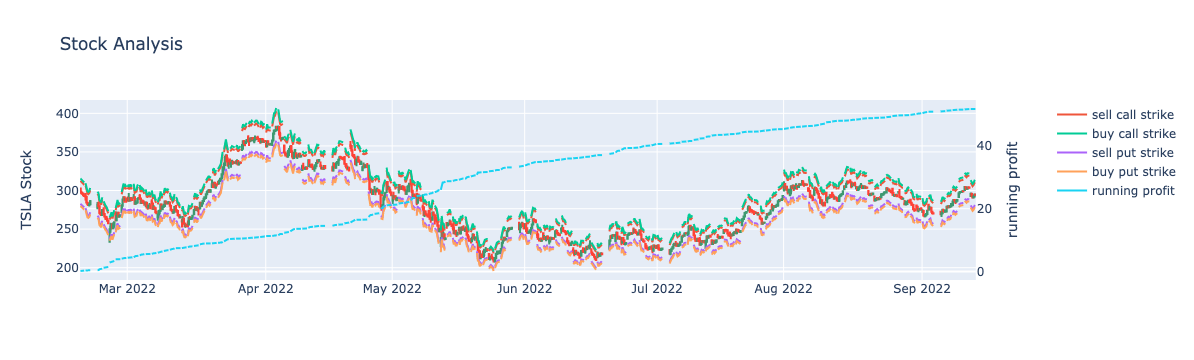

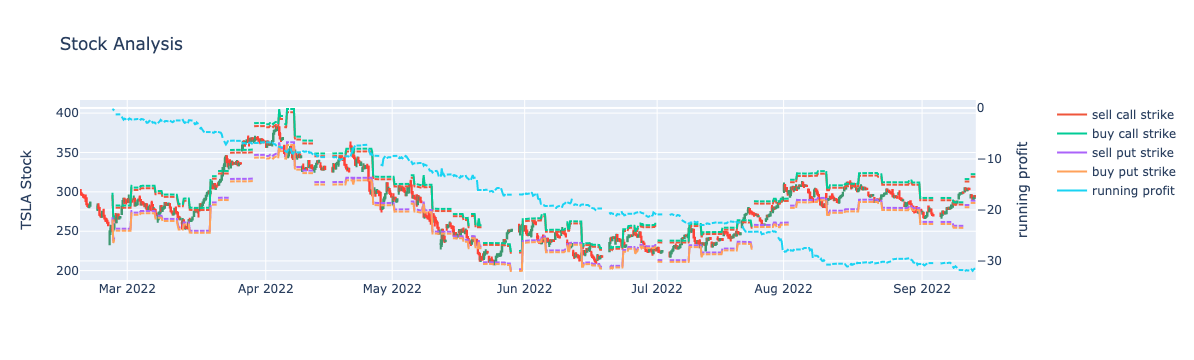

In [50]:
ic = iron_condor(tsla.iloc[-1000:], long_offset=5, short_offset=5, wing_distance=1, poc_window=0)
plot_candles_and_profit(ic, lines=legs)
ic = iron_condor(tsla.iloc[-1000:], long_offset=5, short_offset=5, wing_distance=1, poc_window=30)
plot_candles_and_profit(ic, lines=legs)

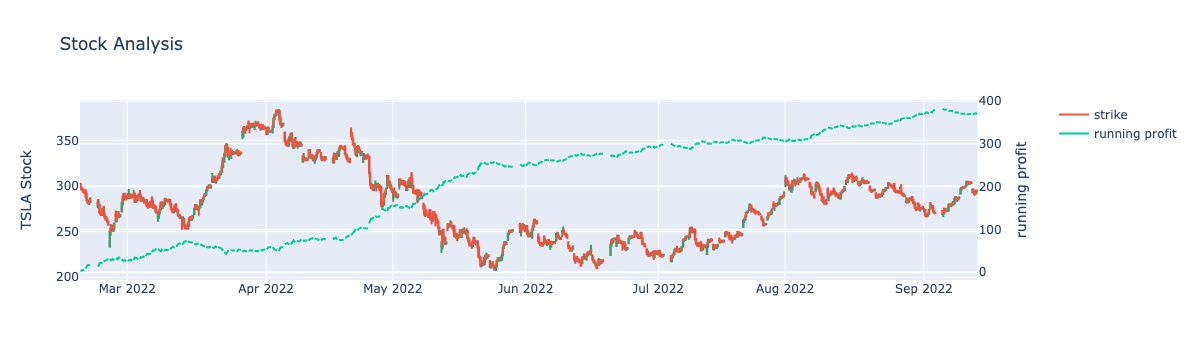

In [57]:
from options import short_calls_dynamic
s = short_calls_dynamic(tsla.iloc[-1000:], percent_offset=0, poc_window=0)
plot_candles_and_profit(s, lines=['strike'])

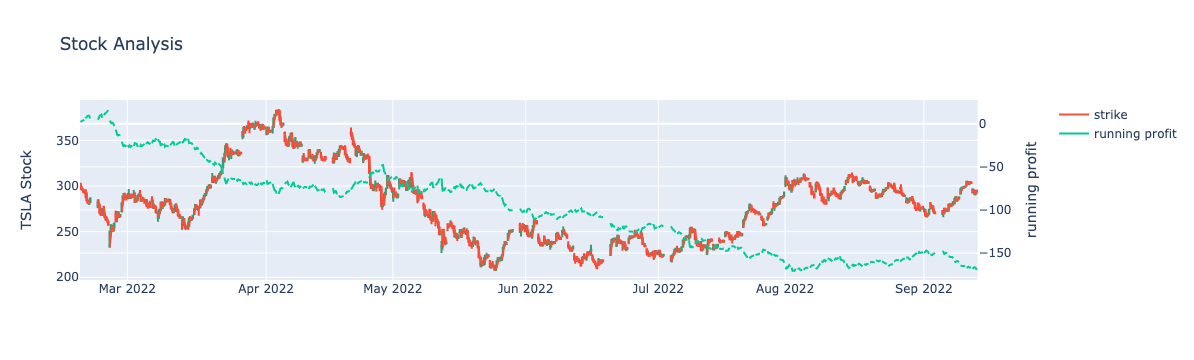

underlying open  underlying high  underlying low  underlying close  \
299           325.94           328.56          325.08            325.73   
300           358.53           364.07          353.83            357.57   
301           357.52           358.91          350.26            352.26   
302           352.27           352.51          345.36            345.69   
303           345.75           347.44          343.33            344.55   
304           344.55           347.17          342.31            342.72   
305           342.69           342.71          332.67            334.62   
306           334.69           337.67          332.14            336.26   
307           338.41           340.78          331.35            340.00   
308           340.04           344.94          335.89            341.57   
309           341.51           344.45          337.88            338.36   
310           338.35           340.57          336.71            337.15   
311           337.20           338.09          334.10            334.22   
312           334.22           338.56          333.98            335.00   
313           334.96           338.62          334.53            335.02   
314           326.46           332.24          325.11            329.84   
315           329.78           336.21          328.36            331.39   
316           331.40           334.54          329.83            330.49   
317           330.41           334.08          328.69            330.81   
318           330.86           333.41          329.87            332.15   
319           332.22           335.59          330.12            330.54   

         volume  strike  call open  call close  hourly profit  \
299   9930154.0  325.94       5.18        5.02           0.16   
300  23957396.0  358.53       4.53        3.98           0.55   
301  18625751.0  357.52       4.44        2.20           2.24   
302  12602620.0  352.27       4.30        1.69           2.61   
303   8857858.0  345.75       4.15        3.49           0.66   
304   7482388.0  344.55       4.06        3.12           0.94   
305  12156982.0  342.69       3.96        1.07           2.89   
306  14782597.0  334.69       3.79        4.56          -0.77   
307  11712409.0  338.41       2.03        2.78          -0.76   
308  14888776.0  340.04       1.89        2.60          -0.71   
309   9482977.0  341.51       1.73        0.45           1.28   
310   6616747.0  338.35       1.53        0.81           0.72   
311   5945668.0  337.20       1.32        0.18           1.14   
312   6768343.0  334.22       1.07        1.21          -0.14   
313  11391436.0  334.96       0.76        0.05           0.70   
314  12254023.0  326.46       7.54        9.36          -1.82   
315  12879358.0  329.78       7.58        8.39          -0.81   
316   6412486.0  331.40       7.58        7.09           0.49   
317   6080215.0  330.41       7.52        7.69          -0.17   
318   4068108.0  330.86       7.49        8.13          -0.64   
319   7183567.0  332.22       7.48        6.61           0.87   

                   date  week     date_expiration   dte  running profit  
299 2022-04-20 16:00:00    16 2022-04-22 16:00:00  2.00          -76.84  
300 2022-04-21 10:00:00    16 2022-04-22 16:00:00  1.25          -76.29  
301 2022-04-21 11:00:00    16 2022-04-22 16:00:00  1.21          -74.05  
302 2022-04-21 12:00:00    16 2022-04-22 16:00:00  1.17          -71.44  
303 2022-04-21 13:00:00    16 2022-04-22 16:00:00  1.12          -70.78  
304 2022-04-21 14:00:00    16 2022-04-22 16:00:00  1.08          -69.85  
305 2022-04-21 15:00:00    16 2022-04-22 16:00:00  1.04          -66.96  
306 2022-04-21 16:00:00    16 2022-04-22 16:00:00  1.00          -67.73  
307 2022-04-22 10:00:00    16 2022-04-22 16:00:00  0.25          -68.48  
308 2022-04-22 11:00:00    16 2022-04-22 16:00:00  0.21          -69.20  
309 2022-04-22 12:00:00    16 2022-04-22 16:00:00  0.17          -67.92  
310 2022-04-22 13:00:00    16 2022-

In [59]:
s = short_calls_dynamic(tsla.iloc[-1000:], percent_offset=0, poc_window=0)
plot_candles_and_profit(s, lines=['strike'])
s.iloc[300-1:320].round(2)

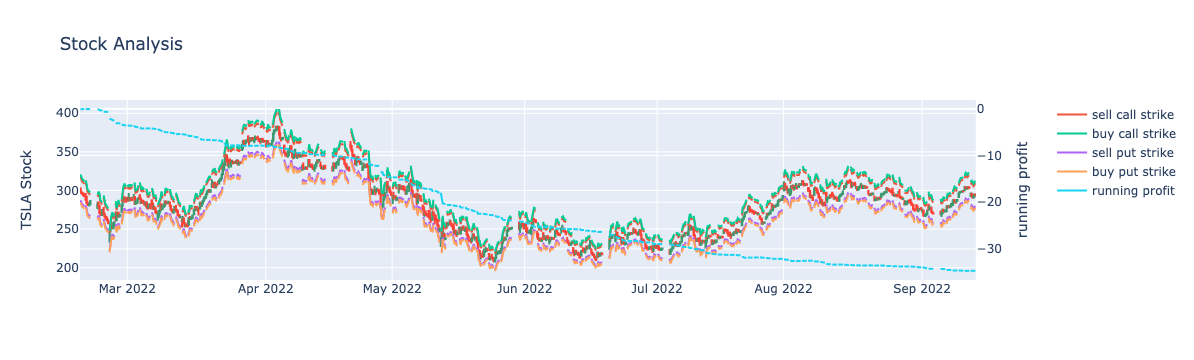

underlying open  underlying high  underlying low  underlying close  \
299           325.94           328.56          325.08            325.73   
300           358.53           364.07          353.83            357.57   
301           357.52           358.91          350.26            352.26   
302           352.27           352.51          345.36            345.69   
303           345.75           347.44          343.33            344.55   
304           344.55           347.17          342.31            342.72   
305           342.69           342.71          332.67            334.62   
306           334.69           337.67          332.14            336.26   
307           338.41           340.78          331.35            340.00   
308           340.04           344.94          335.89            341.57   
309           341.51           344.45          337.88            338.36   
310           338.35           340.57          336.71            337.15   
311           337.20           338.09          334.10            334.22   
312           334.22           338.56          333.98            335.00   
313           334.96           338.62          334.53            335.02   
314           326.46           332.24          325.11            329.84   
315           329.78           336.21          328.36            331.39   
316           331.40           334.54          329.83            330.49   
317           330.41           334.08          328.69            330.81   
318           330.86           333.41          329.87            332.15   
319           332.22           335.59          330.12            330.54   

         volume  sell call strike  buy call strike  sell put strike  \
299   9930154.0            342.24           345.66           309.65   
300  23957396.0            376.46           380.22           340.61   
301  18625751.0            375.40           379.15           339.64   
302  12602620.0            369.88           373.58           334.66   
303   8857858.0            363.04           366.67           328.46   
304   7482388.0            361.77           365.39           327.32   
305  12156982.0            359.83           363.43           325.56   
306  14782597.0            351.43           354.94           317.96   
307  11712409.0            355.33           358.88           321.49   
308  14888776.0            357.04           360.61           323.03   
309   9482977.0            358.59           362.17           324.43   
310   6616747.0            355.27           358.82           321.44   
311   5945668.0            354.06           357.60           320.34   
312   6768343.0            350.93           354.44           317.51   
313  11391436.0            351.71           355.23           318.22   
314  12254023.0            342.79           346.21           310.14   
315  12879358.0            346.27           349.74           313.29   
316   6412486.0            347.97           351.45           314.83   
317   6080215.0            346.93           350.40           313.89   
318   4068108.0            347.40           350.87           314.31   
319   7183567.0            348.83           352.32           315.61   

     buy put strike  ic open  ic close  hourly profit                date  \
299          306.55     0.54      0.53           0.02 2022-04-20 16:00:00   
300          337.20     0.30      0.28           0.02 2022-04-21 10:00:00   
301          336.25     0.28      0.35          -0.07 2022-04-21 11:00:00   
302          331.31     0.26      0.39          -0.14 2022-04-21 12:00:00   
303          325.18     0.23      0.22           0.02 2022-04-21 13:00:00   
304          324.05     0.22      0.21           0.01 2022-04-21 14:00:00   
305          322.30     0.20      0.43          -0.23 2022-04-21 15:00:00   
306          314.78     0.18      0.18          -0.00 2022-04-21 16:00:00   
307          318.27     0.00      0.00           0.00 2022-04-22 10:00:00   
308          319.80  

In [60]:
ic = iron_condor(tsla.iloc[-1000:], long_offset=5, short_offset=5, wing_distance=1, poc_window=0)
plot_candles_and_profit(ic, lines=legs)
ic.iloc[300-1:320].round(2)

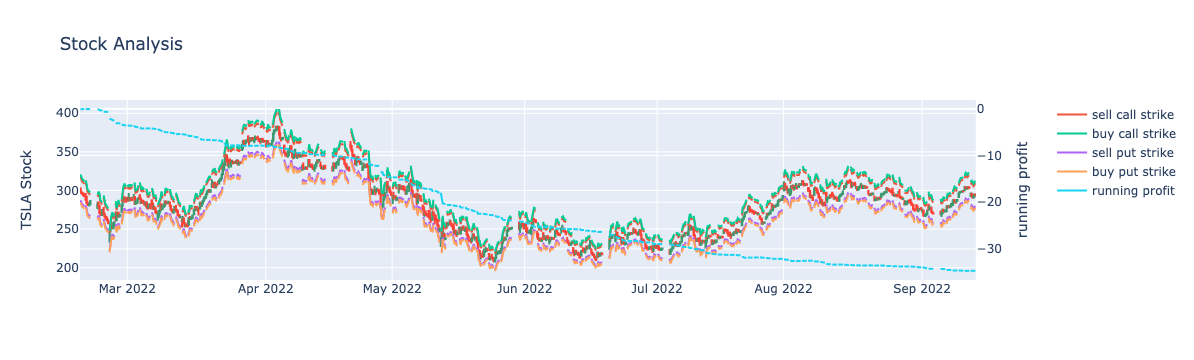

underlying open  underlying high  underlying low  underlying close  \
299           325.94           328.56          325.08            325.73   
300           358.53           364.07          353.83            357.57   
301           357.52           358.91          350.26            352.26   
302           352.27           352.51          345.36            345.69   
303           345.75           347.44          343.33            344.55   
304           344.55           347.17          342.31            342.72   
305           342.69           342.71          332.67            334.62   
306           334.69           337.67          332.14            336.26   
307           338.41           340.78          331.35            340.00   
308           340.04           344.94          335.89            341.57   
309           341.51           344.45          337.88            338.36   
310           338.35           340.57          336.71            337.15   
311           337.20           338.09          334.10            334.22   
312           334.22           338.56          333.98            335.00   
313           334.96           338.62          334.53            335.02   
314           326.46           332.24          325.11            329.84   
315           329.78           336.21          328.36            331.39   
316           331.40           334.54          329.83            330.49   
317           330.41           334.08          328.69            330.81   
318           330.86           333.41          329.87            332.15   
319           332.22           335.59          330.12            330.54   

         volume  sell call strike  buy call strike  sell put strike  \
299   9930154.0            342.24           345.66           309.65   
300  23957396.0            376.46           380.22           340.61   
301  18625751.0            375.40           379.15           339.64   
302  12602620.0            369.88           373.58           334.66   
303   8857858.0            363.04           366.67           328.46   
304   7482388.0            361.77           365.39           327.32   
305  12156982.0            359.83           363.43           325.56   
306  14782597.0            351.43           354.94           317.96   
307  11712409.0            355.33           358.88           321.49   
308  14888776.0            357.04           360.61           323.03   
309   9482977.0            358.59           362.17           324.43   
310   6616747.0            355.27           358.82           321.44   
311   5945668.0            354.06           357.60           320.34   
312   6768343.0            350.93           354.44           317.51   
313  11391436.0            351.71           355.23           318.22   
314  12254023.0            342.79           346.21           310.14   
315  12879358.0            346.27           349.74           313.29   
316   6412486.0            347.97           351.45           314.83   
317   6080215.0            346.93           350.40           313.89   
318   4068108.0            347.40           350.87           314.31   
319   7183567.0            348.83           352.32           315.61   

     buy put strike  ic open  ic close  hourly profit                date  \
299          306.55     0.54      0.53           0.02 2022-04-20 16:00:00   
300          337.20     0.30      0.28           0.02 2022-04-21 10:00:00   
301          336.25     0.28      0.35          -0.07 2022-04-21 11:00:00   
302          331.31     0.26      0.39          -0.14 2022-04-21 12:00:00   
303          325.18     0.23      0.22           0.02 2022-04-21 13:00:00   
304          324.05     0.22      0.21           0.01 2022-04-21 14:00:00   
305          322.30     0.20      0.43          -0.23 2022-04-21 15:00:00   
306          314.78     0.18      0.18          -0.00 2022-04-21 16:00:00   
307          318.27     0.00      0.00           0.00 2022-04-22 10:00:00   
308          319.80  

In [70]:
ic = iron_condor(tsla.iloc[-1000:], long_offset=5, short_offset=5, wing_distance=1, poc_window=0)
plot_candles_and_profit(ic, lines=legs)
ic.iloc[300-1:320].round(2)

<AxesSubplot:xlabel='datetime'>

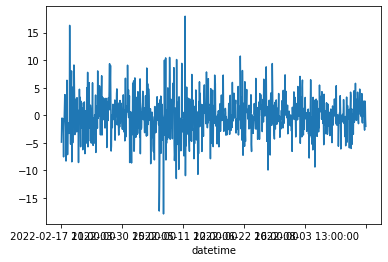

In [67]:
(tsla.iloc[-1000:]['close'] - tsla.iloc[-1000:]['open']).plot()

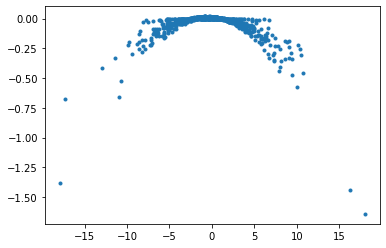

In [73]:
from analysis import movement_vs_profit
movement_vs_profit(ic)

In [74]:
ic['movement'] = (ic['underlying close'] - ic['underlying open'])

In [77]:
H, x, y = np.histogram2d(ic['movement'].array, ic['hourly profit'].array)

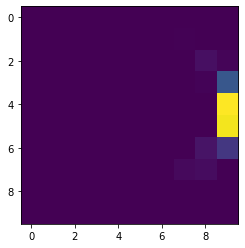

In [79]:
plt.imshow(H)

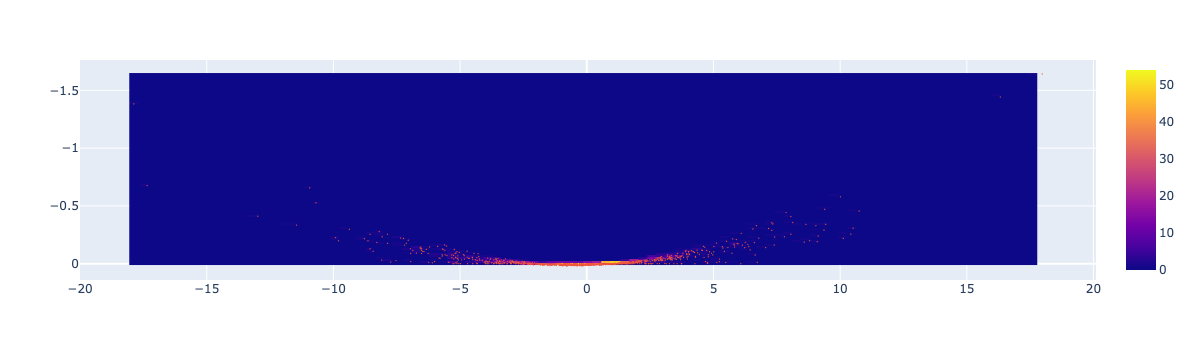

In [105]:
from analysis import movement_vs_profit
movement_vs_profit(ic)

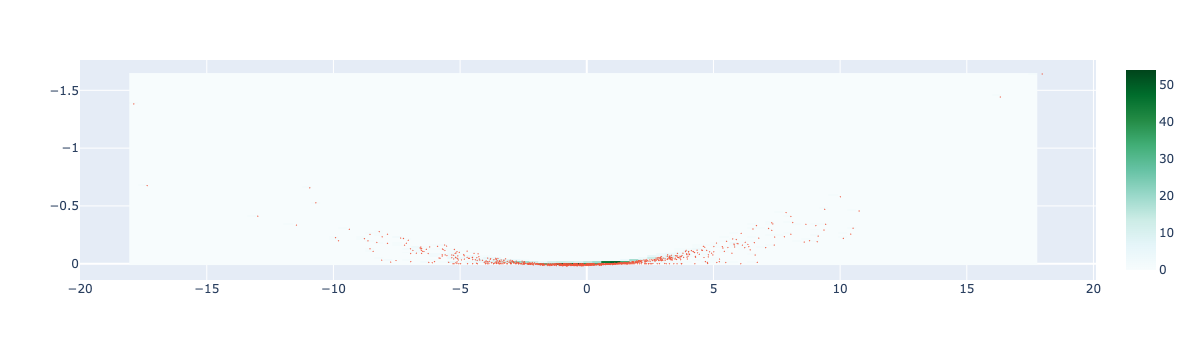

In [111]:
movement_vs_profit(ic)

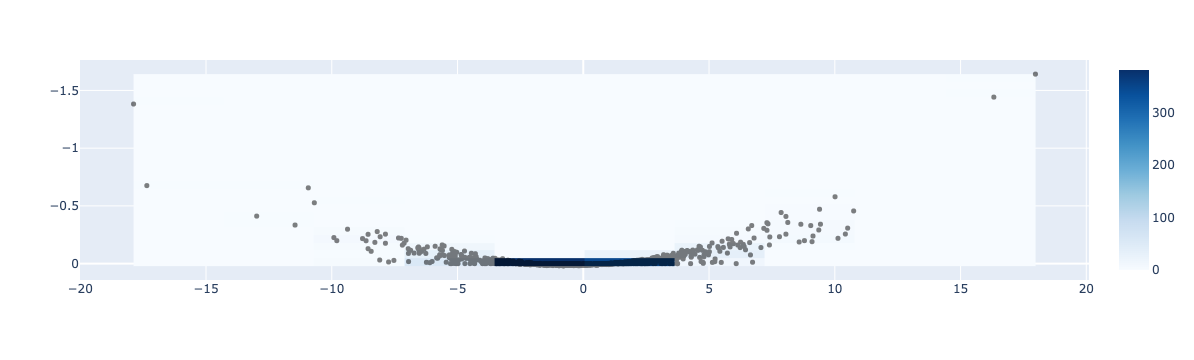

In [128]:
movement_vs_profit(ic)

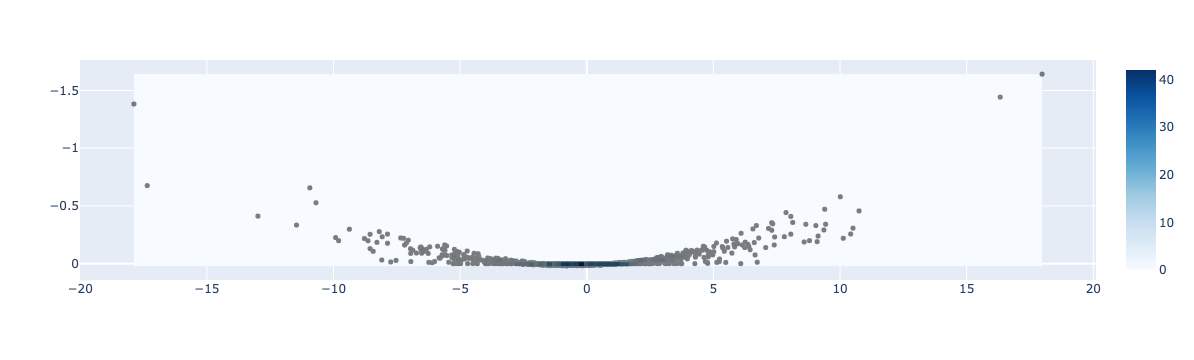

In [136]:
movement_vs_profit(ic)